Author: Nafrees

# <center> Exploratory Data Analysis On Super Store     

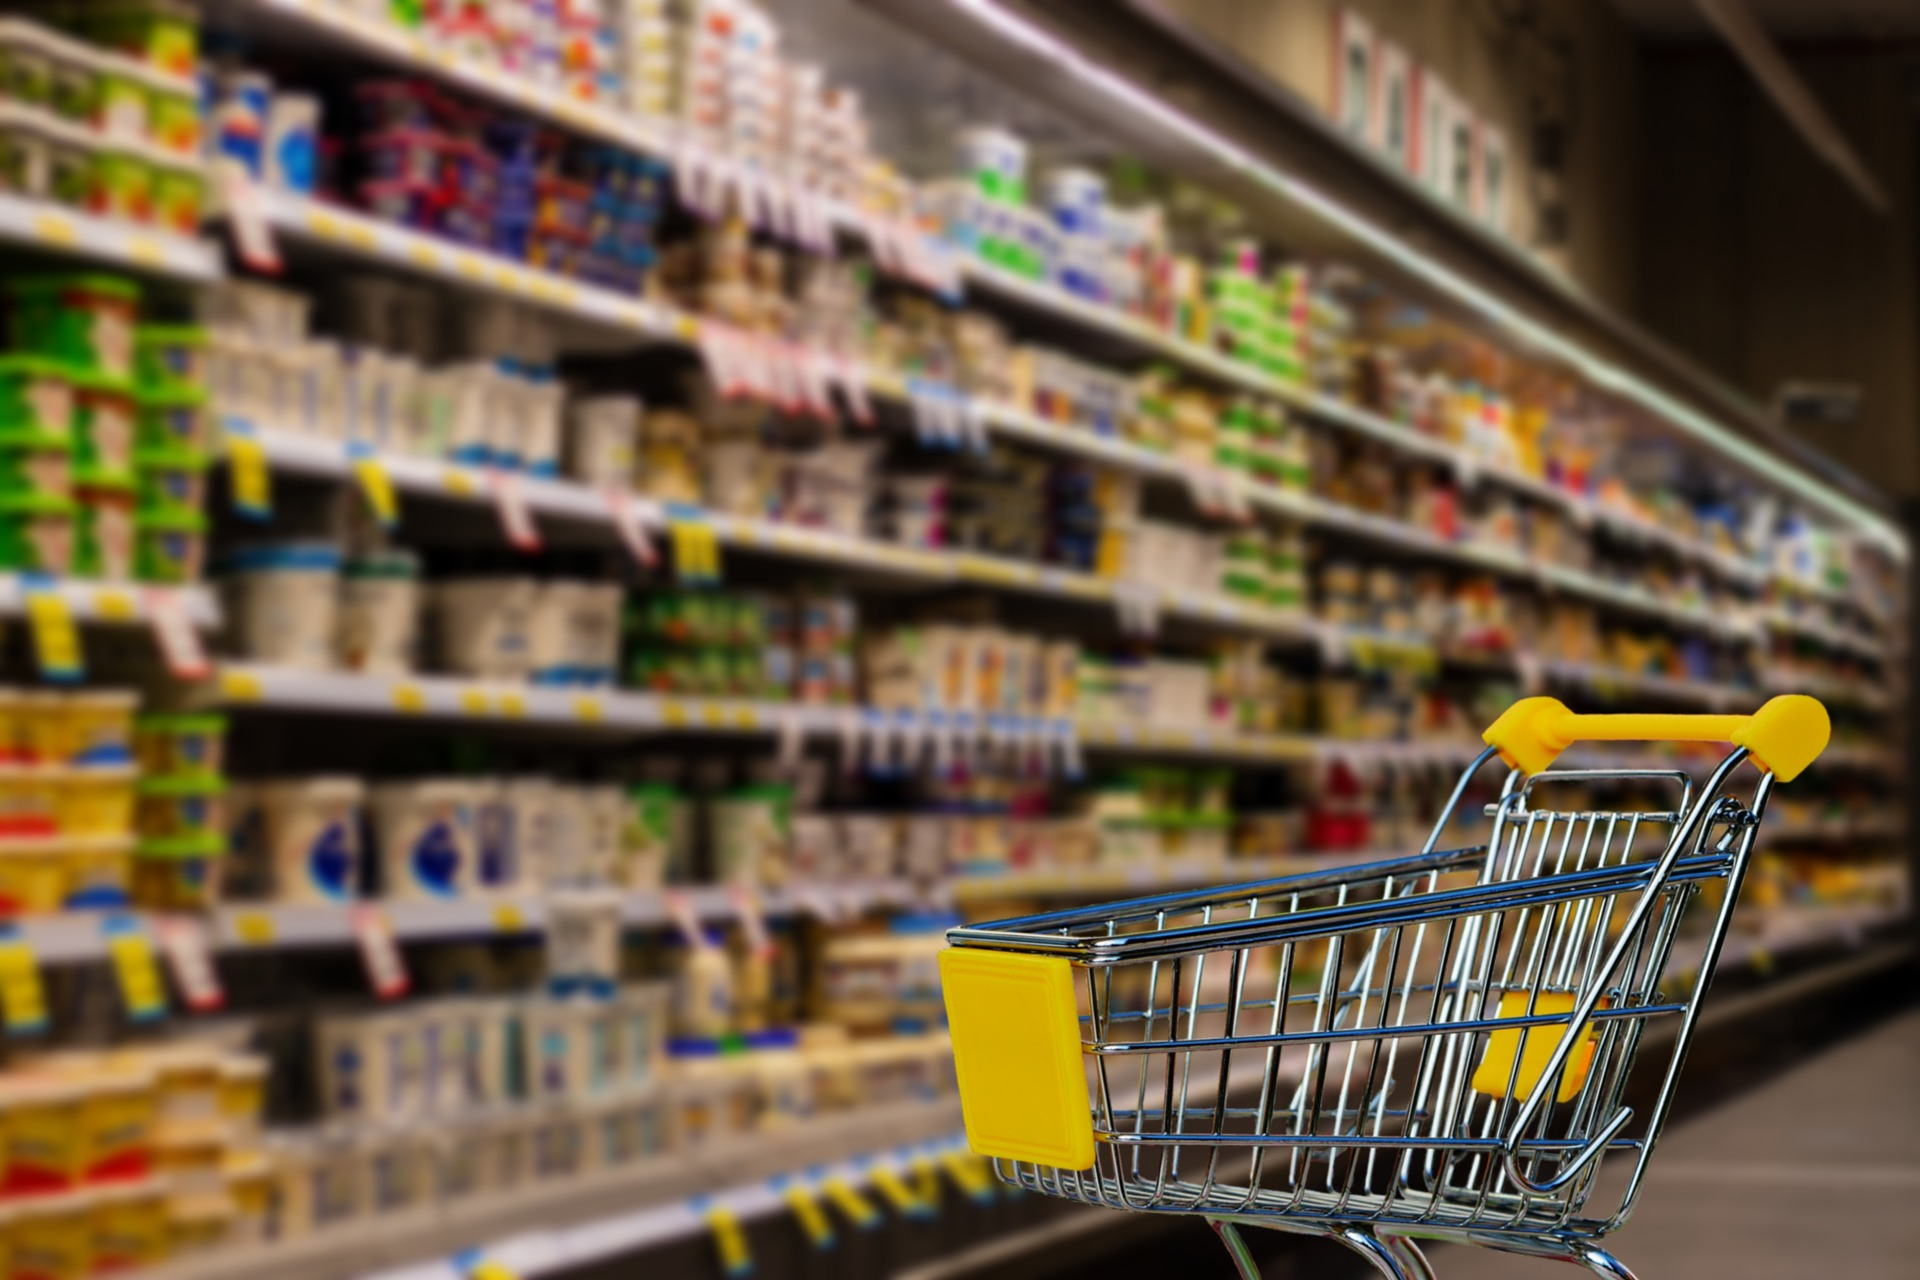

Data based decision making provides businesses with the capabilities to generate real time insights and predictions to optimize their performance. Through this, they can test the success of different strategies and make informed business decisions for sustainable growth.

By exploring and analyzing the <b>Super Store</b> dataset, the following questions can be answered. Thus it will help <b>Super Store</b>'s management to make effective decisions in order to achieve <b>Super Store</b>'s goals and objectives.

<b>Questions asked by Super Store Management </b>
 - Which quarter is best selling in each year?
 - What are the categories having steady sales growth from 2014 to 2017?
 - Who are the top 10 customers in terms of sales value?
 - Which category is best selling and most profitable?
 - What are the best selling and most profitable sub category?
 - Which day of week is best selling?
 - which is the most preferred ship mode?
 - What are the best selling and most profitable regions?
 - Which customer segment is most profitable?
 - what are the Top 5 best selling cities?

In [1]:
#Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data
superstore=pd.read_excel(r'C:\Users\Mohammed Nafrees\Datasets\super_store.xls')

In [3]:
#pandas dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Exploration

In [4]:
#preview first 3 rows of data
superstore.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
#shape of the data set
superstore.shape

(9994, 20)

In [6]:
#basic information about the data set
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [7]:
#column names of the data set
superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
#data types 
superstore.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Data Cleaning

In [11]:
#converting column names into lowercase, replace spaces with underscores
superstore.rename(columns = lambda x: x.lower().replace(' ','_').replace('-','_'), inplace=True)

In [12]:
#find the null values
superstore.isnull().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [13]:
#find the number of duplicate data
superstore.duplicated().sum()

1

In [14]:
#show the duplicated row
superstore[superstore.duplicated(keep = 'last')]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [15]:
#drop the duplicated rows
superstore.drop_duplicates(inplace=True)

In [16]:
#data shape after dropping duplicated row
superstore.shape

(9993, 20)

## Creating New Columns

In [17]:
#get the day of week from order_date column
superstore['dayofweek']=superstore['order_date'].dt.day_name()

In [18]:
#calculate profit margin and create a column for profit margin
superstore['profit_margin_pcnt']=(superstore['profit']/superstore['sales'])*100

In [19]:
#extracting month, quarter and year from order date column
superstore['year']=(superstore['order_date'].dt.year).astype('str')
superstore['month']=superstore['order_date'].dt.month_name()
superstore['quarter'] = pd.PeriodIndex(superstore['order_date'], freq='Q').astype('str')

## Descriptive Statistics

In [20]:
#descriptive statistic summary
superstore.describe()

,postal_code,sales,quantity,discount,profit,profit_margin_pcnt
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971,12.033026
std,32065.074478,623.276074,2.225149,0.206457,234.271476,46.677485
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000,7.500000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000,27.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000


## Pivot Table

In [50]:
#pivoting the data set
pd.pivot_table(superstore, index=(['category', 'region']), columns=['segment']
               ,values=['sales'], aggfunc='sum')

sales                        
segment                    Consumer   Corporate Home Office
category        region                                     
Furniture       Central   86229.219  52085.6018  25482.3430
                East     114211.802  64209.0460  29588.9840
                South     70800.204  29645.0315  16853.4485
                West     119808.087  83080.1065  49724.5500
Office Supplies Central   93111.479  41137.7010  32777.2350
                East     101255.136  66474.7350  37786.1840
                South     59504.581  45930.1700  20216.5620
                West     110080.940  77133.8560  33638.4530
Technology      Central   72690.736  64772.5100  32953.0660
                East     135441.229  69725.5660  59807.1860
                South     65276.186  46310.7310  37184.9910
                West     132991.746  65641.3120  53358.7740

##  Which quarter is best selling in each year?

In [23]:
#group sales by quarter
quarterly_trend=pd.DataFrame(superstore.groupby(['quarter'])['sales'].sum()).reset_index()
quarterly_trend      

,quarter,sales
0,2014Q1,74447.7960
1,2014Q2,86257.3876
2,2014Q3,143633.2123
3,2014Q4,179627.7302
4,2015Q1,68851.7386
5,2015Q2,89124.1870
6,2015Q3,130259.5752
7,2015Q4,182297.0082
8,2016Q1,93237.1810
9,2016Q2,136082.3010


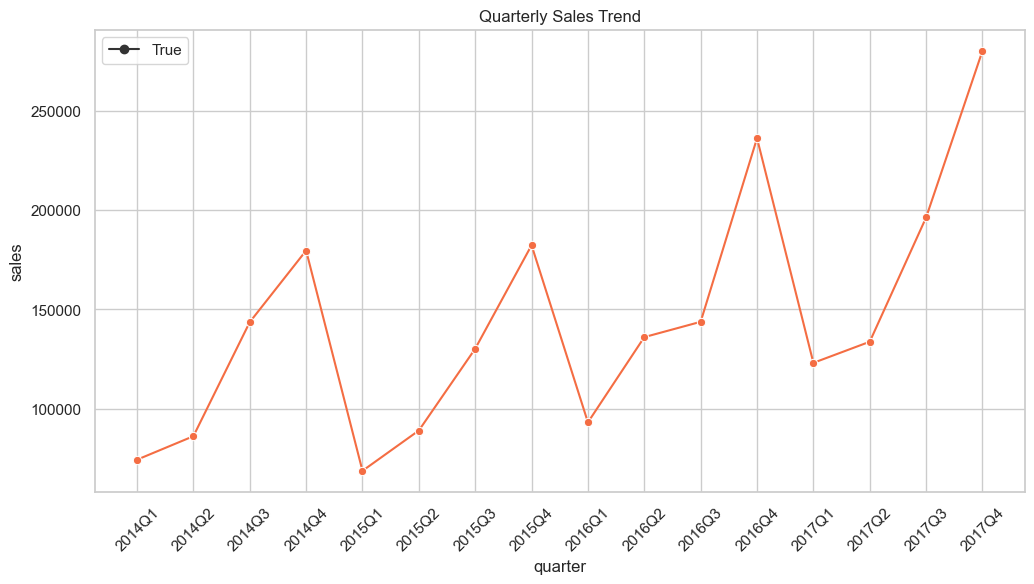

In [46]:
#plot quarterly trend lineplot
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax=sns.lineplot(data=quarterly_trend, x='quarter', y='sales', style=True, markers=True)
ax.tick_params(axis='x', labelrotation = 45)
plt.title('Quarterly Sales Trend')
plt.show()

### Insights
- In each year, the first Quarter is least selling quarter and the fourth Quarter sells the most. 
- The lowest sales recorded in the first Quarter of 2015 and the highest sales recorded in the fourth quarter of 2017.

## What are the categories having steady sales growth from 2014 to 2017?

In [25]:
#group sales by year and segment
yearly_trend = pd.DataFrame(superstore.groupby(['year', 'category'])['sales'].sum()).reset_index()
yearly_trend

,year,category,sales
0,2014,Furniture,156911.4811
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330
3,2015,Furniture,170518.2370
4,2015,Office Supplies,137233.4630
5,2015,Technology,162780.8090
6,2016,Furniture,198901.4360
7,2016,Office Supplies,183939.9820
8,2016,Technology,226364.1800
9,2017,Furniture,215387.2692


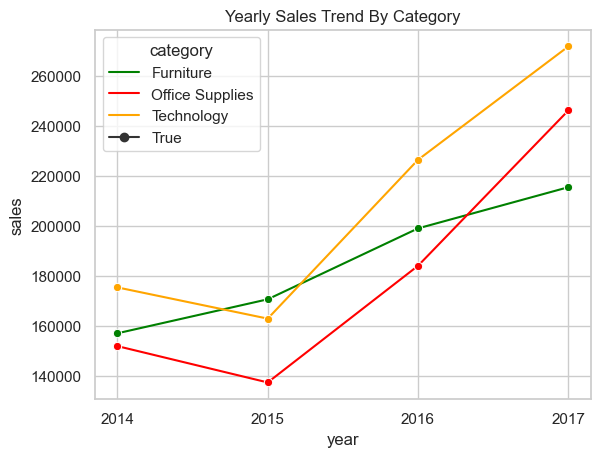

In [47]:
#plot seaborn lineplot
sns.set_style('whitegrid')
sns.lineplot(data = yearly_trend, x='year', y='sales', hue='category', errorbar=None
                ,palette=['green', 'red', 'orange'], style=True, markers=True)

plt.title('Yearly Sales Trend By Category')
plt.show()          

### Insights
- Furniture sales rise steadily from 2014 to 2017.
- Technology and Office Supplies sales declined in 2014, however sales rose dramatically from 2015 to 2017.


## Who are the top 10 customers in terms of sales value?

In [27]:
#group sales by customer name
#sort sales values by descending order
top10_customers= pd.DataFrame(superstore.groupby(['customer_name'])['sales'].sum())
top10_customers=top10_customers.sort_values(by='sales', ascending=False).reset_index().iloc[0:10]
top10_customers

,customer_name,sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


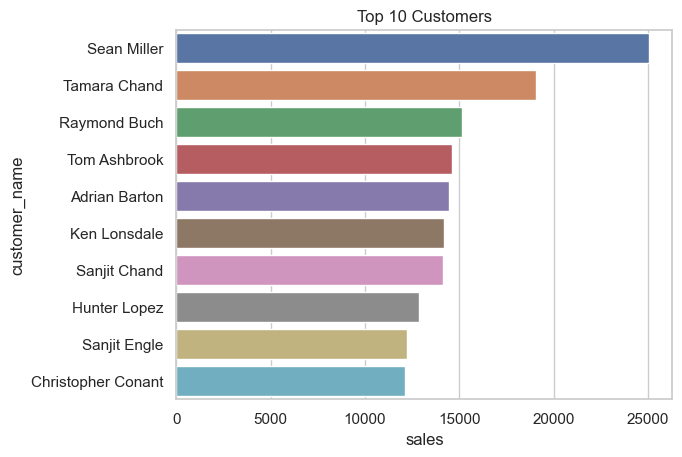

In [28]:
#barplot in seaborn library
sns.set_theme(style="whitegrid")
sns.barplot(data=top10_customers, x='sales', y='customer_name')
plt.title('Top 10 Customers')
plt.show()

## Which category is best selling and most profitable?

In [29]:
#group sales, profit by category
cat_analysis=pd.DataFrame(superstore.groupby(['category'])[['sales', 'profit', 'quantity']].sum())
cat_analysis=cat_analysis.reset_index()
cat_analysis

,category,sales,profit,quantity
0,Furniture,741718.4233,18463.3316,8026
1,Office Supplies,719047.0320,122490.8008,22906
2,Technology,836154.0330,145454.9481,6939


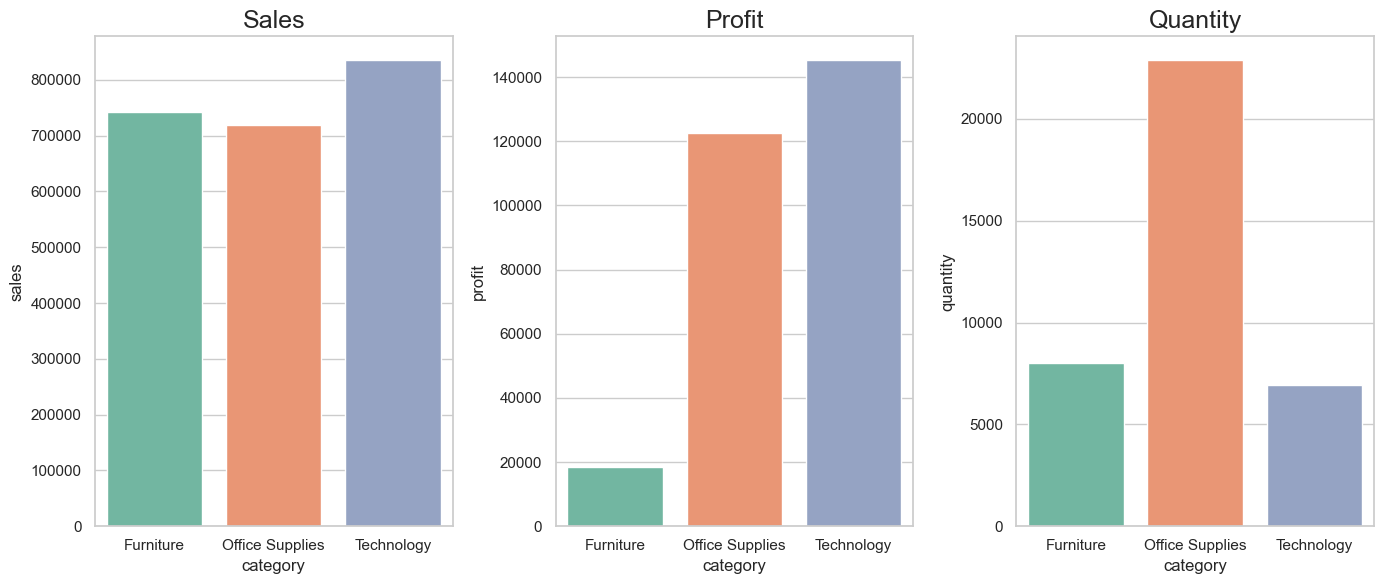

In [30]:
#subplots
figure, axis = plt.subplots(1, 3, figsize=(14, 6))

#seaborn palette setting
sns.set_palette(sns.color_palette("Set2",5 ))

#plot barplots
plot1=sns.barplot(data=cat_analysis, x='category', y='sales', ax=axis[0])
plot2=sns.barplot(data=cat_analysis, x='category', y='profit', ax=axis[1])
plot3=sns.barplot(data=cat_analysis, x='category', y='quantity', ax=axis[2])

#set titles
plot1.axes.set_title("Sales", fontsize=18)
plot2.axes.set_title("Profit", fontsize=18)
plot3.axes.set_title("Quantity", fontsize=18)

#set space between subplots
figure.tight_layout()

### Insights
- Technology is best selling category and it is the most profitable category too.
- Although Furniture makes similar sales as Office Supplies, it is the least profitable category.
- Office Supplies category sells the most in terms of quantity as it is relatively contanins cheap products.

##  What are the best selling and most profitable sub-category?

In [31]:
#group sales, profit by sub-category
subcat_analysis=pd.DataFrame(superstore.groupby(['sub_category'])[['sales', 'profit']].sum())

In [32]:
#sort sales values by descending order
subcat_sales=pd.DataFrame(subcat_analysis.sort_values(by='sales', ascending=False).reset_index())
subcat_sales

,sub_category,sales,profit
0,Phones,330007.0540,44515.7306
1,Chairs,328167.7310,26602.2251
2,Storage,223843.6080,21278.8264
3,Tables,206965.5320,-17725.4811
4,Binders,203412.7330,30221.7633
5,Machines,189238.6310,3384.7569
6,Accessories,167380.3180,41936.6357
7,Copiers,149528.0300,55617.8249
8,Bookcases,114879.9963,-3472.5560
9,Appliances,107532.1610,18138.0054


In [33]:
#sort profit by descending order
subcat_profit=pd.DataFrame(subcat_analysis.sort_values(by='profit',ascending=False).reset_index())
subcat_profit

,sub_category,sales,profit
0,Copiers,149528.0300,55617.8249
1,Phones,330007.0540,44515.7306
2,Accessories,167380.3180,41936.6357
3,Paper,78479.2060,34053.5693
4,Binders,203412.7330,30221.7633
5,Chairs,328167.7310,26602.2251
6,Storage,223843.6080,21278.8264
7,Appliances,107532.1610,18138.0054
8,Furnishings,91705.1640,13059.1436
9,Envelopes,16476.4020,6964.1767


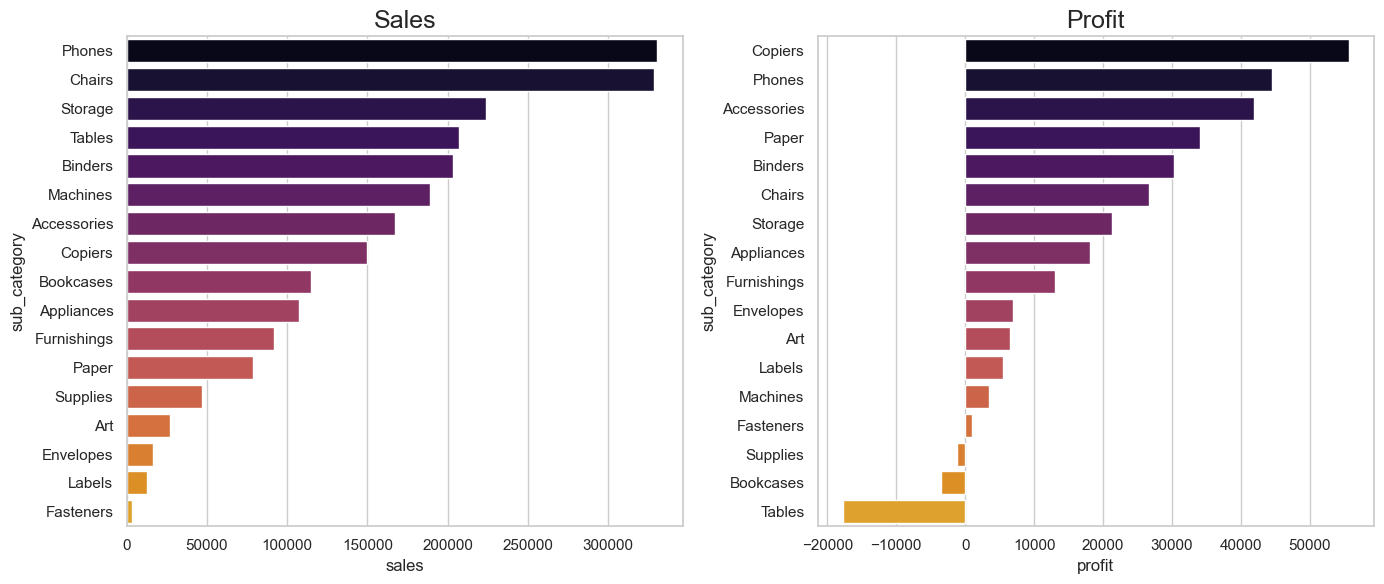

In [34]:
#seaborn palette setting
sns.set_palette(sns.color_palette("inferno", 20))

figure, axis = plt.subplots(1, 2, figsize=(14, 6))

#barplots
subcat1=sns.barplot(data=subcat_sales, x='sales', y='sub_category', ax=axis[0])
subcat2=sns.barplot(data=subcat_profit, x='profit', y='sub_category', ax=axis[1])

#set titles
subcat1.axes.set_title("Sales", fontsize=18)
subcat2.axes.set_title("Profit", fontsize=18)

#set space between subplots
figure.tight_layout()

### Insights
- Phones and Chairs are Top 2 best selling sub-categories.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders.
- Supplies, Bookcases and Tables make negative margin.

## Which day of week is best selling?

In [35]:
dow_analysis=pd.DataFrame(superstore.groupby(['dayofweek'])['sales'].sum())
dow_analysis=dow_analysis.sort_values(by='sales', ascending=False).reset_index()
dow_analysis

,dayofweek,sales
0,Monday,428937.8157
1,Friday,427692.2593
2,Sunday,385353.8464
3,Saturday,357984.6830
4,Thursday,321965.7785
5,Tuesday,287209.5022
6,Wednesday,87775.6032


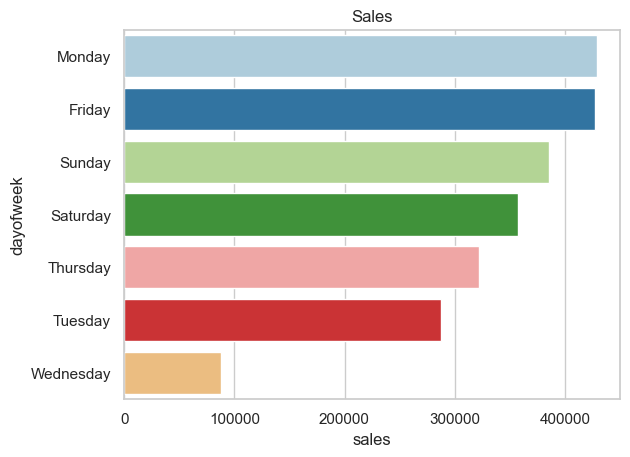

In [36]:
#seaborn palette setting
sns.set_palette(sns.color_palette("Paired", 7))
                        
#plot barplots
sns.barplot(data=dow_analysis, x='sales', y='dayofweek')
plt.title('Sales')
plt.show()

### Insights
- Monday and Friday are Top 2 best selling days in week.
- Wednesday is the least selling day in week.

## which is the most preferred ship mode?

In [37]:
#counting the unique values 
superstore['ship_mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

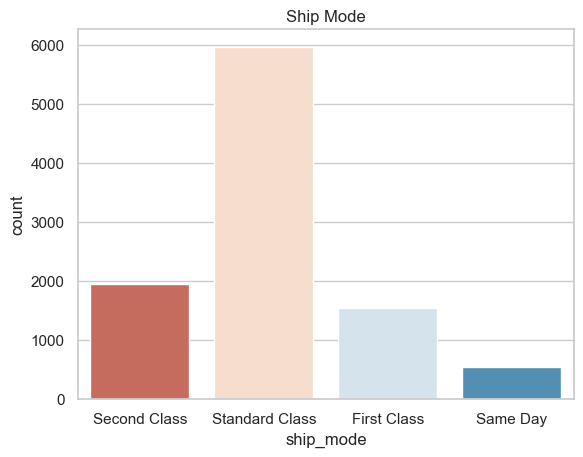

In [38]:
#plot ship mode
sns.countplot(data=superstore, x='ship_mode', palette='RdBu')
plt.title('Ship Mode')
plt.show()

### Insights
- Standard Class is the most preferred ship mode among others.

##  What are the best selling and  most profitable regions?

In [39]:
region_analysis=pd.DataFrame(superstore.groupby(['region'])[['sales', 'profit']].sum()).reset_index()
region_analysis

,region,sales,profit
0,Central,501239.8908,39706.3625
1,East,678499.8680,91534.8388
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


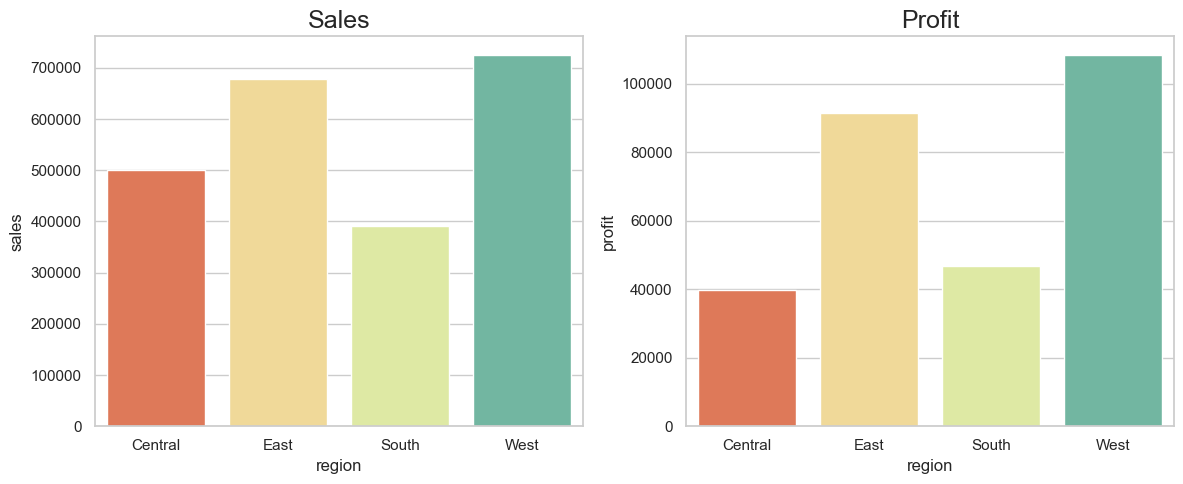

In [40]:
#subplots
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
                                        
#seaborn palette setting
sns.set_palette(sns.color_palette("Spectral", 4))

#plot barplots
r1=sns.barplot(data=region_analysis, x='region', y='sales',  ax=axis[0])
r2=sns.barplot(data=region_analysis, x='region', y='profit',  ax=axis[1])

#set titles
r1.axes.set_title("Sales", fontsize=18)
r2.axes.set_title("Profit", fontsize=18)


#set space between subplots
figure.tight_layout()

### Insights
- West and East regions are best selling and most profitable.

## Which customer segment is most profitable?

In [41]:
#group sales and profit by segment
segment_analysis=pd.DataFrame(superstore.groupby(['segment'])[['sales', 'profit']].sum()).round(2)
segment_analysis

,sales,profit
segment,,
Consumer,1161401.34,134119.21
Corporate,706146.37,91979.13
Home Office,429371.78,60310.74


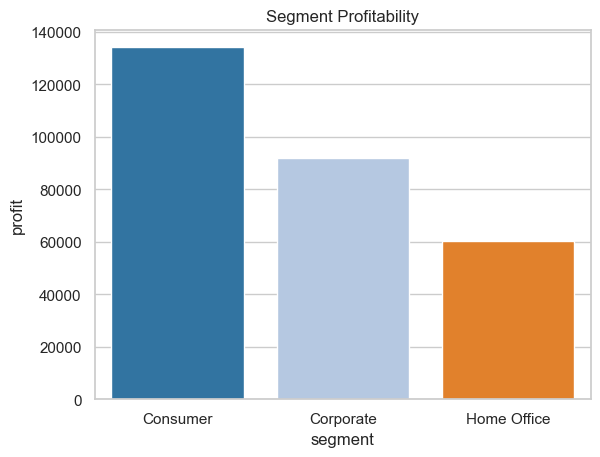

In [42]:
#plot barplots
sns.barplot(data=segment_analysis, x=segment_analysis.index, y='profit', palette='tab20')
plt.title('Segment Profitability')
plt.show()

### Insights
- Consumer segment is most profitable, followed by Corporate and Home Office.

##  what are the Top 5 best selling cities ?

In [43]:
#grouping sales by cities
city_analysis=pd.DataFrame(superstore.groupby(['city'])['sales'].sum())
top5_cities=city_analysis.sort_values(by='sales', ascending=False).reset_index().iloc[0:5]
top5_cities

,city,sales
0,New York City,256368.161
1,Los Angeles,175851.341
2,Seattle,119540.742
3,San Francisco,112669.092
4,Philadelphia,109077.013


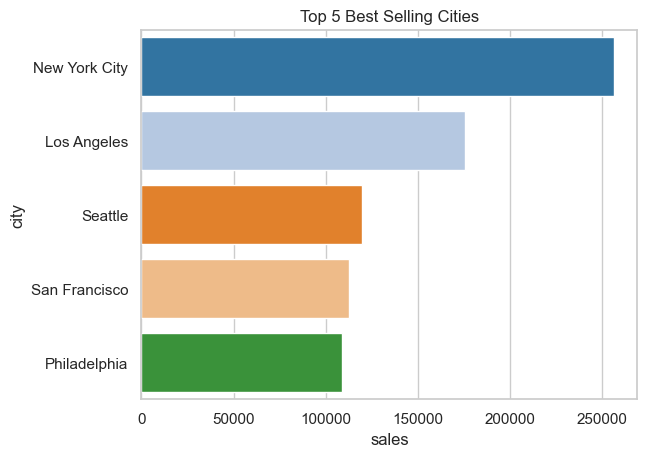

In [44]:
#plot barplots
sns.barplot(data=top5_cities, x='sales', y='city', palette='tab20')
plt.title('Top 5 Best Selling Cities')
plt.show()